In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from konlpy.tag import *
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

In [2]:
short_df = pd.read_excel('한국어_단발성_대화_데이터셋.xlsx')
short_df

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [3]:
short_df['Emotion'].value_counts()

행복    6037
놀람    5898
분노    5665
공포    5468
혐오    5429
슬픔    5267
중립    4830
Name: Emotion, dtype: int64

In [4]:
encoder = LabelEncoder()
short_df['Emotion_'] = encoder.fit_transform(short_df['Emotion'].values)
short_df

,Sentence,Emotion,Emotion_
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,0
1,그냥 내 느낌일뿐겠지?,공포,0
2,아직너무초기라서 그런거죠?,공포,0
3,유치원버스 사고 낫다던데,공포,0
4,근데 원래이런거맞나요,공포,0
...,...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오,6
38590,재미가 없으니 망하지,혐오,6
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오,6
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오,6


In [5]:
ohe = OneHotEncoder(sparse=False)
result = short_df['Emotion']

In [6]:
result.shape

(38594,)

In [7]:
result.values.reshape(-1, 1).shape

(38594, 1)

In [8]:
ohe.fit(result.values.reshape(-1, 1))

OneHotEncoder(sparse=False)

In [9]:
one_hot_encoded = ohe.transform(result.values.reshape(-1, 1))
one_hot_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
train_Y = one_hot_encoded
train_Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
sentences = list(short_df['Sentence'].values)
sentences

['언니 동생으로 부르는게 맞는 일인가요..??',
 '그냥 내 느낌일뿐겠지?',
 '아직너무초기라서 그런거죠?',
 '유치원버스 사고 낫다던데',
 '근데 원래이런거맞나요',
 ' 남자친구가 떠날까봐요',
 '이거 했는데 허리가 아플수도 있나요? ;;',
 '내가불안해서꾸는걸까..',
 ' 일주일도 안 남았당...ㅠㅠ',
 '약은 최대한 안먹으려고 하는데좋은 음시있나요?0',
 ' 구직활동 하면서 남는시간은 뭘로 활용해야 되지..',
 '괜찮은분 같아서 괜히 조급해지네요 ㅜ',
 ' 제가 스타일을 바꾸면 더 어색하게만 변할것같아서 ㅠ0',
 '아내 있으면 여자 있는 술집가면 법 적으로 문제있나요?',
 ' 한소리들을지.... 도와주세요',
 '도와주실분 없나요..',
 '그냥 잡다한거말고학업에 관련된거 듣는게 더 좋은가요?',
 ' 가격은 반값....이거 질이 다른건가요??',
 '마지막에 말씀 드렸던대로 글은 이제 내릴게요의도치않게 실시간베스트글에 올라가서 남친이 볼거 같아서요 ㅠㅠ',
 '화장품회사다보니, 젊은 여자들이 많은거 같은데 걱정이네요..',
 ' 몸무게 1키로찌는건 아니겠죠?',
 'o자 다리 많이 심한가요?',
 ' 안하는게 나을까요??',
 '그정도로 더러운가요.........',
 ' 보통 가진통도 이렇게 오래가나요?',
 '여자가 술취해서 먼저 전화하는거 짜증나요???',
 '걱정이 큽니다',
 '이거 무슨 증상이죠??ㅜㅜ',
 ' 다름 아니라 제동생 걱정 입니다',
 '아무래도 무리겠죠?',
 '애인으로써 정말 걱정됩니다',
 '이러다 일주일전에 나오는거 아닌가몰라요',
 '경고먹을까 고민0',
 '극도로 예민하고 불안한 상태에요',
 ' 못받으면 어떡하죠',
 ' 안검하수도어울릴까요?',
 '근데 그게 사마귀 일수 있데요.',
 '이제 곧 내년이면 22살인 여대생입니다...요즘 고민이 있는데요...',
 ' 안하는게 좋은가요?',
 '자제할수있는 방법 뭐 없을까요??',
 '집에와서 또 운동하긴했는데지난 3주의 노력이 물거품이 될까봐

In [12]:
sentences = [re.sub(r'[^가-힣A-Za-z0-9]', ' ', sentence) for sentence in sentences]
sentences = [re.sub(r'\s+', ' ', sentence) for sentence in sentences]
sentences

['언니 동생으로 부르는게 맞는 일인가요 ',
 '그냥 내 느낌일뿐겠지 ',
 '아직너무초기라서 그런거죠 ',
 '유치원버스 사고 낫다던데',
 '근데 원래이런거맞나요',
 ' 남자친구가 떠날까봐요',
 '이거 했는데 허리가 아플수도 있나요 ',
 '내가불안해서꾸는걸까 ',
 ' 일주일도 안 남았당 ',
 '약은 최대한 안먹으려고 하는데좋은 음시있나요 0',
 ' 구직활동 하면서 남는시간은 뭘로 활용해야 되지 ',
 '괜찮은분 같아서 괜히 조급해지네요 ',
 ' 제가 스타일을 바꾸면 더 어색하게만 변할것같아서 0',
 '아내 있으면 여자 있는 술집가면 법 적으로 문제있나요 ',
 ' 한소리들을지 도와주세요',
 '도와주실분 없나요 ',
 '그냥 잡다한거말고학업에 관련된거 듣는게 더 좋은가요 ',
 ' 가격은 반값 이거 질이 다른건가요 ',
 '마지막에 말씀 드렸던대로 글은 이제 내릴게요의도치않게 실시간베스트글에 올라가서 남친이 볼거 같아서요 ',
 '화장품회사다보니 젊은 여자들이 많은거 같은데 걱정이네요 ',
 ' 몸무게 1키로찌는건 아니겠죠 ',
 'o자 다리 많이 심한가요 ',
 ' 안하는게 나을까요 ',
 '그정도로 더러운가요 ',
 ' 보통 가진통도 이렇게 오래가나요 ',
 '여자가 술취해서 먼저 전화하는거 짜증나요 ',
 '걱정이 큽니다',
 '이거 무슨 증상이죠 ',
 ' 다름 아니라 제동생 걱정 입니다',
 '아무래도 무리겠죠 ',
 '애인으로써 정말 걱정됩니다',
 '이러다 일주일전에 나오는거 아닌가몰라요',
 '경고먹을까 고민0',
 '극도로 예민하고 불안한 상태에요',
 ' 못받으면 어떡하죠',
 ' 안검하수도어울릴까요 ',
 '근데 그게 사마귀 일수 있데요 ',
 '이제 곧 내년이면 22살인 여대생입니다 요즘 고민이 있는데요 ',
 ' 안하는게 좋은가요 ',
 '자제할수있는 방법 뭐 없을까요 ',
 '집에와서 또 운동하긴했는데지난 3주의 노력이 물거품이 될까봐정말 걱정되요',
 '옳은 선택인지 모르겠음',
 '8월이면 둘째가 태어나서 마음이

In [13]:
# han = Hannanum()
okt = Okt()
# sentences = [han.morphs(sentence) for sentence in sentences]
sentences = [okt.morphs(sentence) for sentence in sentences]
sentences

[['언니', '동생', '으로', '부르는게', '맞는', '일', '인가요'],
 ['그냥', '내', '느낌', '일', '뿐', '겠지'],
 ['아직', '너무', '초기', '라서', '그런', '거', '죠'],
 ['유치원', '버스', '사고', '낫다던데'],
 ['근데', '원래', '이런거', '맞나요'],
 ['남자친구', '가', '떠날까봐', '요'],
 ['이', '거', '했는데', '허리', '가', '아플수도', '있나요'],
 ['내', '가', '불안해서', '꾸는걸', '까'],
 ['일주일', '도', '안', '남았당'],
 ['약', '은', '최대한', '안', '먹으려고', '하는데', '좋은', '음시', '있나요', '0'],
 ['구직', '활동', '하면서', '남는', '시간', '은', '뭘', '로', '활용', '해야', '되지'],
 ['괜찮은', '분', '같아서', '괜히', '조급해지네요'],
 ['제', '가', '스타일', '을', '바꾸면', '더', '어색하게만', '변할것', '같아서', '0'],
 ['아내', '있으면', '여자', '있는', '술집', '가면', '법', '적', '으로', '문제', '있나요'],
 ['한소리', '들을지', '도와주세요'],
 ['도와주실', '분', '없나요'],
 ['그냥', '잡다한거말고', '학업', '에', '관련', '된거', '듣는게', '더', '좋은가요'],
 ['가격', '은', '반값', '이', '거', '질', '이', '다른', '건가', '요'],
 ['마지막',
  '에',
  '말씀',
  '드렸던대로',
  '글',
  '은',
  '이제',
  '내릴게요',
  '의도',
  '치',
  '않게',
  '실시간',
  '베스트',
  '글',
  '에',
  '올라가서',
  '남친',
  '이',
  '볼거',
  '같아서요'],
 ['화장품', '회사', '다', '보니', '젊은', '여자', '들', 

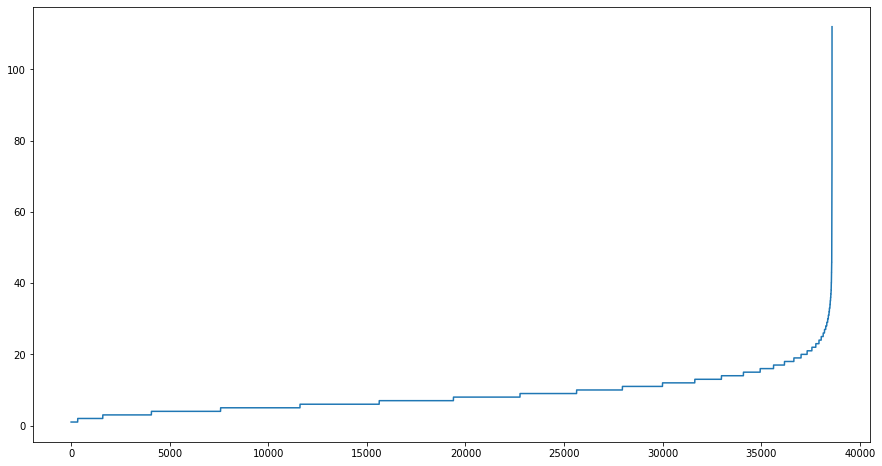

37328


In [14]:
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.figure(figsize=(15,8))
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=20) for l in sentence_len]))

In [15]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence if len(word)>1][:20])
sentences = sentences_new

In [16]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

train_X[:5]

array([[  494,   670,     1,  6848,  1082,   190,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   18,   270,  1174,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  106,     3,  3104,   548,   125,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 2001,  1045,   227, 17468,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   26,   253,   605,  1864,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0]], dtype=int32)

In [17]:
train_set = list(zip(train_X, train_Y))
train_set

[(array([ 494,  670,    1, 6848, 1082,  190,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
  array([1., 0., 0., 0., 0., 0., 0.])),
 (array([  18,  270, 1174,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
  array([1., 0., 0., 0., 0., 0., 0.])),
 (array([ 106,    3, 3104,  548,  125,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
  array([1., 0., 0., 0., 0., 0., 0.])),
 (array([ 2001,  1045,   227, 17468,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0], dtype=int32),
  array([1., 0., 0., 0., 0., 0., 0.])),
 (array([  26,  253,  605, 1864,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
  array([1., 0., 0., 0., 0., 0., 0.])),
 (arra

In [18]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Embedding(20000, 500, input_length=20))
    model.add(layers.Bidirectional(layers.LSTM(100, activation='relu')))
    # model.add(layers.Bidirectional(layers.LSTM(64)))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 500)           10000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               480800    
_________________________________________________________________
dense (Dense)                (None, 7)                 1407      
Total params: 10,482,207
Trainable params: 10,482,207
Non-trainable params: 0
_________________________________________________________________


In [19]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                save_weights_only=True,
                                                verbose=1)

In [20]:
history = model.fit(train_X, train_Y, shuffle=True ,epochs=10, batch_size=100, validation_data=(train_X, train_Y))

Epoch 1/10
386/386 [==============================] - 74s 187ms/step - loss: 1.6258 - accuracy: 0.3579 - val_loss: 1.1610 - val_accuracy: 0.5969
Epoch 2/10
386/386 [==============================] - 72s 186ms/step - loss: 1.1571 - accuracy: 0.5653 - val_loss: 0.8160 - val_accuracy: 0.7534
Epoch 3/10
386/386 [==============================] - 72s 188ms/step - loss: 0.8038 - accuracy: 0.7030 - val_loss: 0.5170 - val_accuracy: 0.8350
Epoch 4/10
386/386 [==============================] - 73s 189ms/step - loss: 0.5509 - accuracy: 0.7965 - val_loss: 0.3355 - val_accuracy: 0.8914
Epoch 5/10
386/386 [==============================] - 73s 189ms/step - loss: 0.3919 - accuracy: 0.8554 - val_loss: 0.2480 - val_accuracy: 0.9171
Epoch 6/10
386/386 [==============================] - 73s 190ms/step - loss: 0.2946 - accuracy: 0.8905 - val_loss: 0.2023 - val_accuracy: 0.9353
Epoch 7/10
386/386 [==============================] - 73s 189ms/step - loss: 0.2299 - accuracy: 0.9149 - val_loss: 0.1597 - val_ac

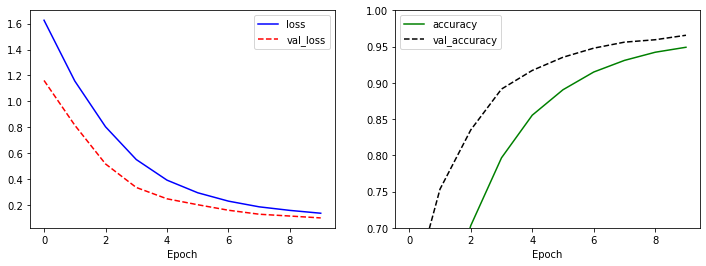

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [22]:
model.evaluate(train_X, train_Y)

1207/1207 [==============================] - 7s 6ms/step - loss: 0.1006 - accuracy: 0.9656


[0.10057471692562103, 0.9656423330307007]

In [23]:
result_emotion = {0:"공포", 1:"놀람", 2:"분노", 3:"슬픔", 4:"중립", 
                 5:"행복", 6:"혐오"}

In [24]:
test_sentence = input("하고싶은 말을 하세요: ")
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=20)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])
    result = prediction[idx]
    res_ind = np.argmax(result)
print("감정분석 결과: ", result_emotion[res_ind])

하고싶은 말을 하세요: 코딩 공부하는 것은 너무 스트레스에요
['코딩']
[2.5663708e-06 9.9074990e-01 1.3216696e-03 8.6070900e-04 7.2790258e-06
 7.0258840e-03 3.1902578e-05]
['코딩', '공부하는']
[2.5663708e-06 9.9074990e-01 1.3216696e-03 8.6070900e-04 7.2790258e-06
 7.0258840e-03 3.1902578e-05]
['코딩', '공부하는', '것은']
[2.5663708e-06 9.9074990e-01 1.3216696e-03 8.6070900e-04 7.2790258e-06
 7.0258840e-03 3.1902578e-05]
['코딩', '공부하는', '것은', '너무']
[9.4238903e-06 8.8336015e-01 1.1994904e-03 7.1339130e-02 2.5579623e-06
 4.3936346e-02 1.5299438e-04]
['코딩', '공부하는', '것은', '너무', '스트레스에요']
[9.4238903e-06 8.8336015e-01 1.1994904e-03 7.1339130e-02 2.5579623e-06
 4.3936346e-02 1.5299438e-04]
감정분석 결과:  놀람
